In [64]:
import itertools
import os
from pathlib import Path

import numpy as np
import pandas as pd
import imagehash
import skimage
from PIL import Image, UnidentifiedImageError
from tqdm.auto import tqdm as tn

from pandarallel import pandarallel


tn.pandas()
pandarallel.initialize(progress_bar=True, nb_workers=os.cpu_count())

INFO: Pandarallel will run on 64 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [65]:

DATA_PATH = Path("data")
COMP_DATA_PATH = Path("data")
IMAGE_PATH = Path("dataset")

TEST_SET = COMP_DATA_PATH / "test-data.csv"
TRAIN_SPLIT = DATA_PATH / "train_split_20perval_grouped_stratified.csv"
VAL_SPLIT = DATA_PATH / "val_split_20perval_grouped_stratified.csv"

IMG_GLOB = "images_*_unpadded/*.jpg"

In [66]:
def bind_fs(df, path: Path, glob: str):
    mapping = {x.name: x for x in path.glob(glob)}
    return df.applymap(lambda x: mapping.get(x))

In [67]:
df = pd.read_csv("boosting_v2_sift_val_pred.csv", index_col=0)
df[["image_path1", "image_path2"]] = bind_fs(df.filter(like="image_url"), IMAGE_PATH, IMG_GLOB)
df["predict_label"] = (df["predict"] > 0.5).astype(int)


In [68]:
errdf = df[df["is_same"] != df["predict_label"]]

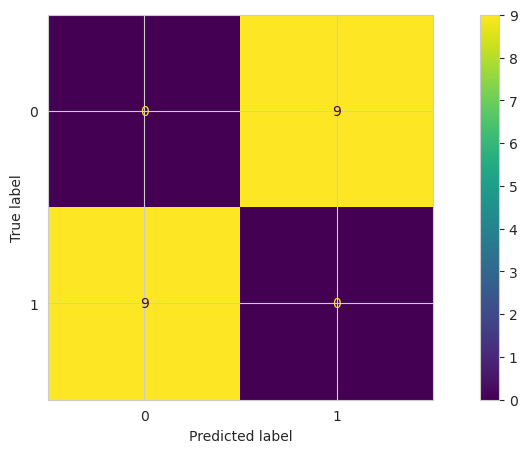

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# errdf2 = errdf.drop(errdf.iloc[[8, 9, 10, 14]].index)
errdf2 = errdf

cm = confusion_matrix(errdf2["is_same"], errdf2["predict_label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [30]:
from IPython.display import display


def display_side_by_side(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[0].axis("off")
    ax[1].axis("off")

In [ ]:
[1, 2, 4, 7, 8, 18]


In [ ]:
[1, 4]

Text(0.5, 0.98, 'True label is 1, predicted 0')

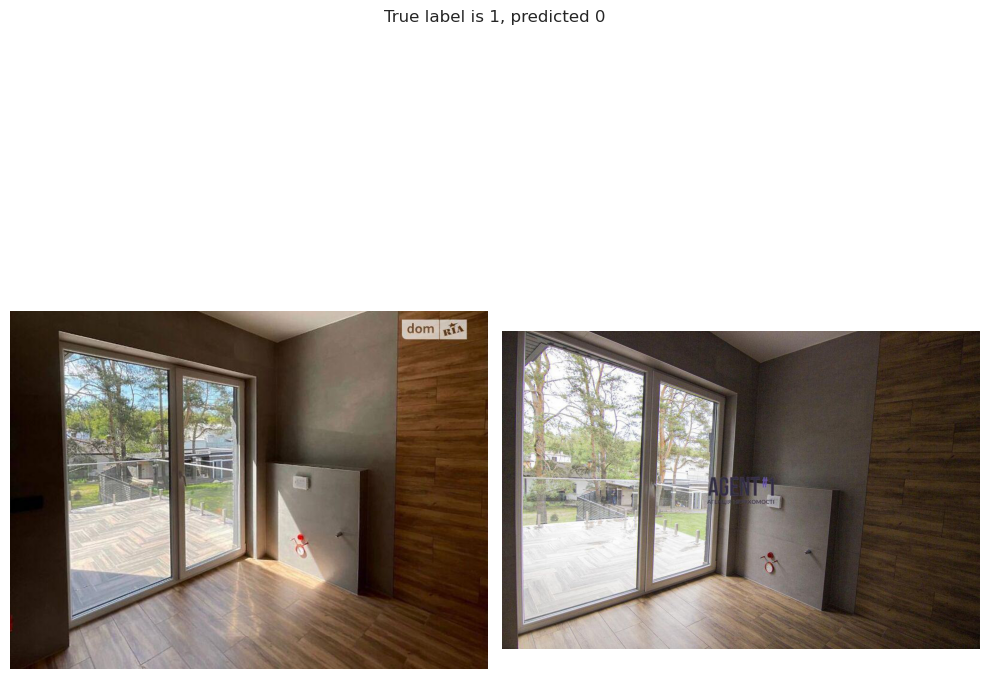

In [80]:
row = errdf.iloc[5]
img1 = Image.open(row["image_path1"])
img2 = Image.open(row["image_path2"])
display_side_by_side(img1, img2)
plt.tight_layout()
plt.suptitle("True label is {}, predicted {}".format(row["is_same"], row["predict_label"]))

In [81]:
row

image_url1                                        931621673.jpg
image_url2                                        936193806.jpg
is_same                                                       1
image_path1         dataset/images_train_unpadded/931621673.jpg
image_path2         dataset/images_train_unpadded/936193806.jpg
ahash_16                                                     70
ahash_8                                                      19
ahash_4                                                       6
phash_16_8                                                  106
phash_8                                                      14
phash_4                                                       2
dhash_verical_16                                            106
dhash_16                                                     79
dhash_8                                                      17
dhash_4                                                       2
colorhash_21                            

In [19]:
errdf["predict"].describe()

count    21.000000
mean      0.334919
std       0.290111
min       0.063418
25%       0.072909
50%       0.256260
75%       0.425135
max       0.869532
Name: predict, dtype: float64

In [22]:
v = df[df["predict_label"] == df["is_same"]]["predict"]

((v > 0.1) & (v < 0.9)).sum()

5874